## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


In this homework, we will use the lead scoring dataset Bank Marketing dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv).


In this dataset our desired target for classification task will be `converted` variable - has the client signed up to the platform or not. 

### Data preparation

* Check if the missing values are presented in the features.
* If there are missing values:
    * For caterogiral features, replace them with 'NA'
    * For numerical features, replace with with 0.0 


Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use `train_test_split` function for that with `random_state=1`

In [238]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [239]:
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv

In [240]:
df_origin = pd.read_csv("course_lead_scoring.csv")

In [241]:
df_origin.isna().sum()

lead_source                 128
industry                    134
number_of_courses_viewed      0
annual_income               181
employment_status           100
location                     63
interaction_count             0
lead_score                    0
converted                     0
dtype: int64

In [242]:
df_origin.dtypes

lead_source                  object
industry                     object
number_of_courses_viewed      int64
annual_income               float64
employment_status            object
location                     object
interaction_count             int64
lead_score                  float64
converted                     int64
dtype: object

In [243]:
def prepare_data(df):
    df_result = df.copy()
    df_result["annual_income"] = df_result["annual_income"].fillna(0)
    df_result["lead_source"] = df_result["lead_source"].fillna("NA")
    df_result["industry"] = df_result["industry"].fillna("NA")
    df_result["employment_status"] = df_result["employment_status"].fillna("NA")
    df_result["location"] = df_result["location"].fillna("NA")

    return df_result

In [244]:
df = prepare_data(df_origin)

In [245]:
df.isna().sum()

lead_source                 0
industry                    0
number_of_courses_viewed    0
annual_income               0
employment_status           0
location                    0
interaction_count           0
lead_score                  0
converted                   0
dtype: int64

In [246]:
df.head()

,lead_source,industry,number_of_courses_viewed,annual_income,employment_status,location,interaction_count,lead_score,converted
0,paid_ads,NA,1,79450.0,unemployed,south_america,4,0.94,1
1,social_media,retail,1,46992.0,employed,south_america,1,0.80,0
2,events,healthcare,5,78796.0,unemployed,australia,3,0.69,1
3,paid_ads,retail,2,83843.0,NA,australia,1,0.87,0
4,referral,education,3,85012.0,self_employed,europe,3,0.62,1


In [247]:
random_state = 1

In [248]:
target_column = "converted"
categorical_columns = ["lead_source", "industry", "employment_status", "location"]
numerical_columns = ["interaction_count", "lead_score", "number_of_courses_viewed", "annual_income"]

In [249]:
from pandas import DataFrame


def split_features_and_target(df_train: DataFrame, df_validation, df_test):
    y_train = df_train[target_column].values
    y_validation = df_validation[target_column].values
    y_test = df_test[target_column].values

    df_train = df_train.drop([target_column], axis=1)
    df_validation = df_validation.drop([target_column], axis=1)
    df_test = df_test.drop([target_column], axis=1)

    return df_train, y_train, df_validation, y_validation, df_test, y_test

In [250]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=random_state)

In [251]:
df_train, df_validation = train_test_split(df_full_train, test_size=0.25, random_state=random_state)

In [252]:
df_train, y_train, df_validation, y_validation, df_test, y_test = split_features_and_target(df_train, df_validation, df_test)

In [253]:
df_train.isna().sum(), df_validation.isna().sum(), df_test.isna().sum()

(lead_source                 0
 industry                    0
 number_of_courses_viewed    0
 annual_income               0
 employment_status           0
 location                    0
 interaction_count           0
 lead_score                  0
 dtype: int64,
 lead_source                 0
 industry                    0
 number_of_courses_viewed    0
 annual_income               0
 employment_status           0
 location                    0
 interaction_count           0
 lead_score                  0
 dtype: int64,
 lead_source                 0
 industry                    0
 number_of_courses_viewed    0
 annual_income               0
 employment_status           0
 location                    0
 interaction_count           0
 lead_score                  0
 dtype: int64)

In [254]:
def create_dictionaries(df_train, df_validation, columns):
    dict_train = df_train[columns].to_dict(orient="records")
    dict_validation = df_validation[columns].to_dict(orient="records")

    return dict_train, dict_validation

In [255]:
from sklearn.feature_extraction import DictVectorizer


def create_vectorizer_and_learn_categories(dict_train) -> DictVectorizer:
    dv = DictVectorizer(sparse=False)
    dv.fit(dict_train)

    return dv

In [256]:
def create_model_and_train(dict_train, y, dv: DictVectorizer) -> LogisticRegression:
    X = dv.transform(dict_train)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=random_state)
    model.fit(X, y)

    return model

In [257]:
def get_accuracy(X_validation, y_validation, model, threshold=0.5):
    y_pred = model.predict_proba(X_validation)[:,1]

    converted_validation_decision = (y_pred >= threshold)
    converted_validation_decision

    accuracy = (converted_validation_decision.astype(int) == y_validation).mean()

    return accuracy

### Accuracy and Dummy Model
Why do we use `0.5` as a threshold? can we find a better value?

In [258]:
thresholds = np.linspace(0, 1, 21)
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [259]:
columns_accuracy = categorical_columns + numerical_columns
threshold_accuracy_collection = {}

dict_train, dict_validation = create_dictionaries(df_train, df_validation, columns_accuracy)
vectorizer_original_accuracy = create_vectorizer_and_learn_categories(dict_train)
model_original_accuracy = create_model_and_train(dict_train, y_train, vectorizer_original_accuracy)

X_validation = vectorizer_original_accuracy.transform(dict_validation)

for threshold in thresholds:
    accuracy = get_accuracy(X_validation, y_validation, model_original_accuracy, threshold)
    print(f"Accuracy for the threshold {threshold}: {accuracy}")
    threshold_accuracy_collection[threshold] = accuracy

Accuracy for the threshold 0.0: 0.5836177474402731
Accuracy for the threshold 0.05: 0.5836177474402731
Accuracy for the threshold 0.1: 0.5836177474402731
Accuracy for the threshold 0.15000000000000002: 0.5836177474402731
Accuracy for the threshold 0.2: 0.5836177474402731
Accuracy for the threshold 0.25: 0.5836177474402731
Accuracy for the threshold 0.30000000000000004: 0.5938566552901023
Accuracy for the threshold 0.35000000000000003: 0.6006825938566553
Accuracy for the threshold 0.4: 0.6416382252559727
Accuracy for the threshold 0.45: 0.6791808873720137
Accuracy for the threshold 0.5: 0.6996587030716723
Accuracy for the threshold 0.55: 0.7474402730375427
Accuracy for the threshold 0.6000000000000001: 0.7474402730375427
Accuracy for the threshold 0.65: 0.7337883959044369
Accuracy for the threshold 0.7000000000000001: 0.6928327645051194
Accuracy for the threshold 0.75: 0.6552901023890785
Accuracy for the threshold 0.8: 0.6143344709897611
Accuracy for the threshold 0.8500000000000001: 0.

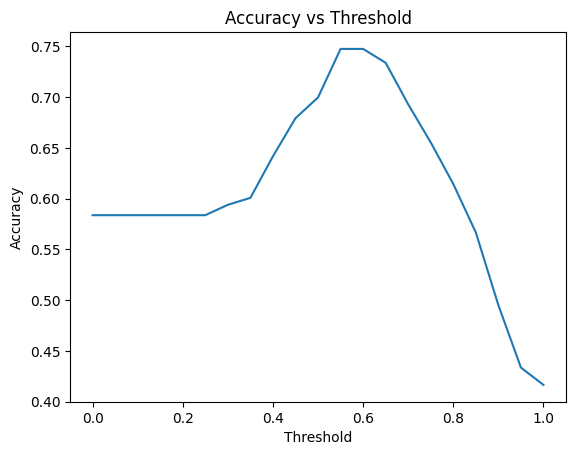

In [260]:
plt.plot(list(threshold_accuracy_collection.keys()), list(threshold_accuracy_collection.values()))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Threshold')
plt.show()

Accuracy makes sense on the balance datasets.For instance, when the target value is close to 50%:

In [261]:
y_train.mean()

np.float64(0.6210045662100456)

With 62% of customers converted, accuracy becomes a misleading evaluation metric because a naive model could achieve high accuracy by simply always predicting the majority class, without learning the underlying patterns that distinguish converted from non-converted customers.

### Question 1: ROC AUC feature importance

ROC AUC could also be used to evaluate feature importance of numerical variables. 

Let's do that

* For each numerical variable, use it as score (aka prediction) and compute the AUC with the `y` variable as ground truth.
* Use the training dataset for that


If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['balance']`)

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

- `lead_score`
- `number_of_courses_viewed`
- `interaction_count`
- `annual_income`